Прогноз цены на страховку

Подключаем либы и считваем файл

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_to_data = './insurance.csv'
df = pd.read_csv(path_to_data)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.shape # кол-во записей

df.info() 
df.isnull().sum() # проверка не пустых значении 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
df.dtypes  # проверка типов

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
#категорийные значения
print(df.sex.value_counts())
print("----------")
print(df.smoker.value_counts())
print("----------")
print(df.region.value_counts())

male      676
female    662
Name: sex, dtype: int64
----------
no     1064
yes     274
Name: smoker, dtype: int64
----------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [3]:
#делаем маппинг
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], prefix=['sex', 'smoker', 'region'])
df.drop(['sex_female', 'smoker_no'], axis=1, inplace=True)
df.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [6]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


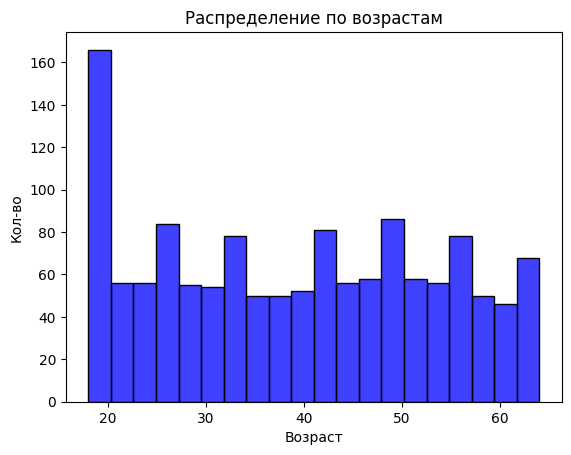

In [7]:
#age distribution
sns.histplot(df.age, bins=20, color='blue')
plt.title('Распределение по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Кол-во')
plt.show()

Text(0.5, 1.0, 'Распределение по полу')

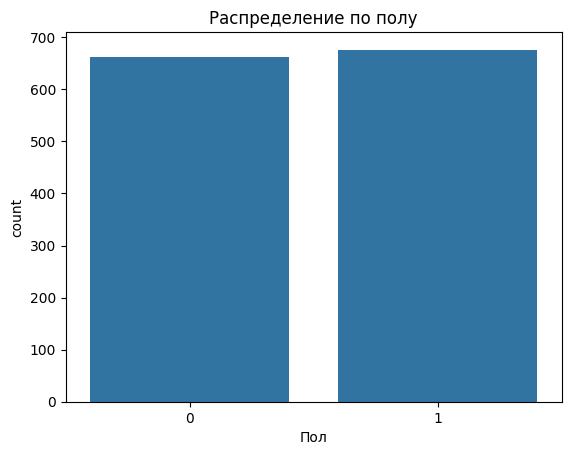

In [8]:
sns.countplot(x = 'sex', data = df)
plt.xlabel('Пол')
plt.title('Распределение по полу')

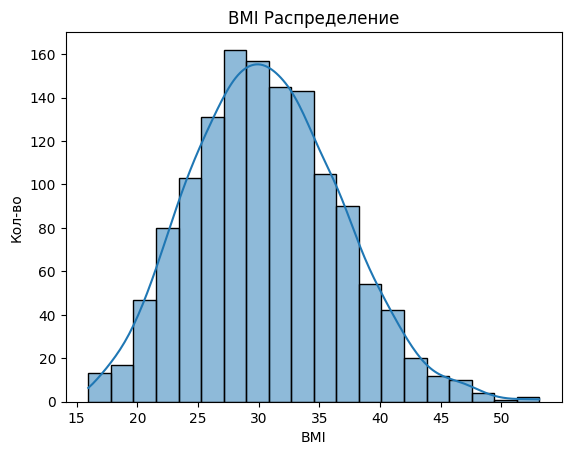

In [9]:
sns.histplot(df.bmi,bins=20, kde=True)
plt.title('BMI Распределение')
plt.xlabel('BMI')
plt.ylabel('Кол-во')
plt.show()

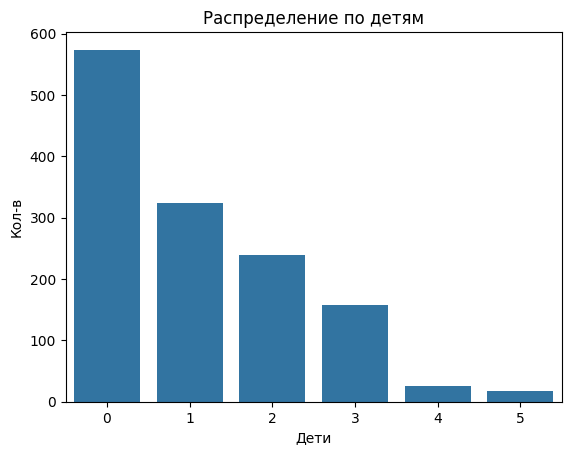

In [10]:
sns.countplot(x = 'children', data = df)
plt.title('Распределение по детям')
plt.xlabel('Дети')
plt.ylabel('Кол-в')
plt.show()

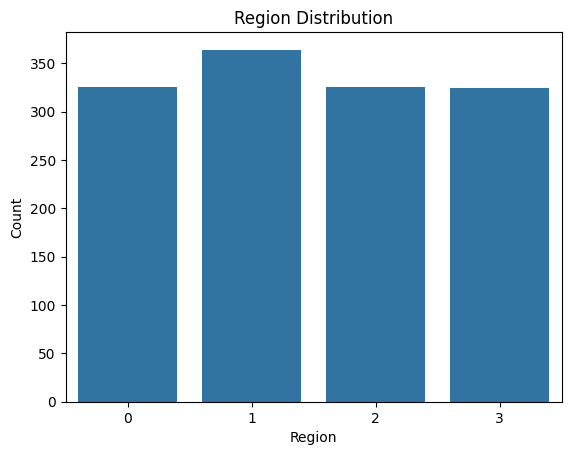

In [11]:
sns.countplot(x = 'region', data = df)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

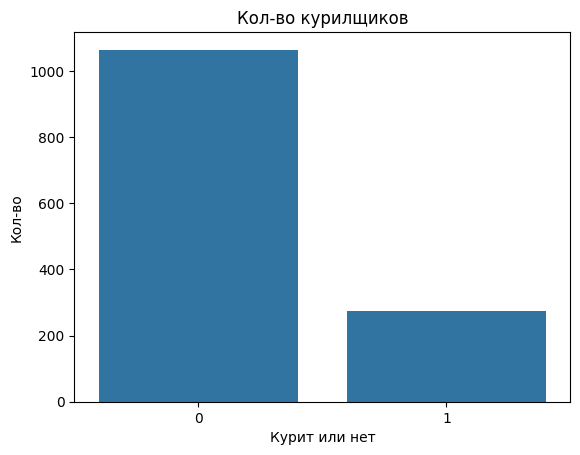

In [12]:
sns.countplot(x = 'smoker', data = df)
plt.title('Кол-во курилщиков')
plt.xlabel('Курит или нет')
plt.ylabel('Кол-во')
plt.show()

Text(0.5, 0, 'Курит или нет')

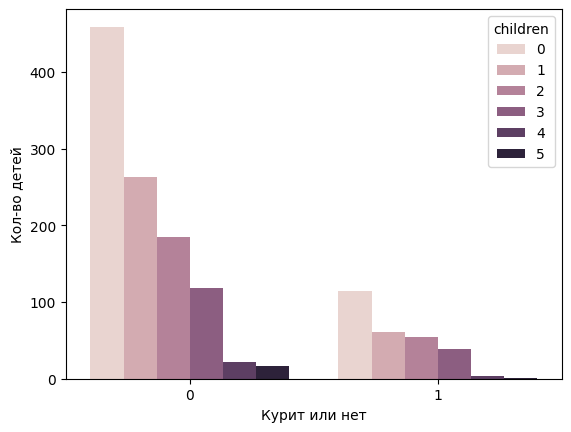

In [13]:
sns.countplot(x = df.smoker, hue = df.children)
plt.ylabel('Кол-во детей')
plt.xlabel('Курит или нет')


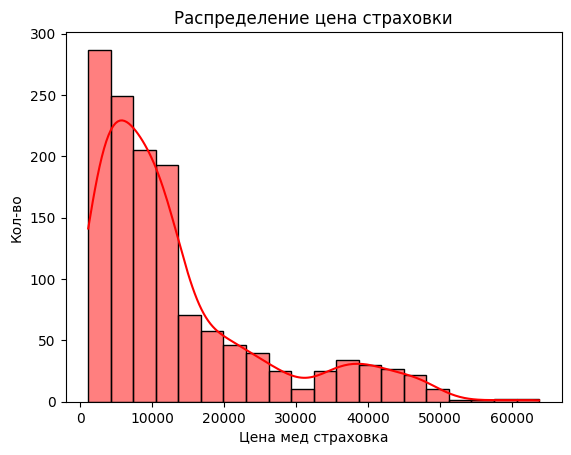

In [14]:
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Распределение цена страховки')
plt.xlabel('Цена мед страховка')
plt.ylabel('Кол-во')
plt.show()

In [15]:
df.corr() # кореляция


,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


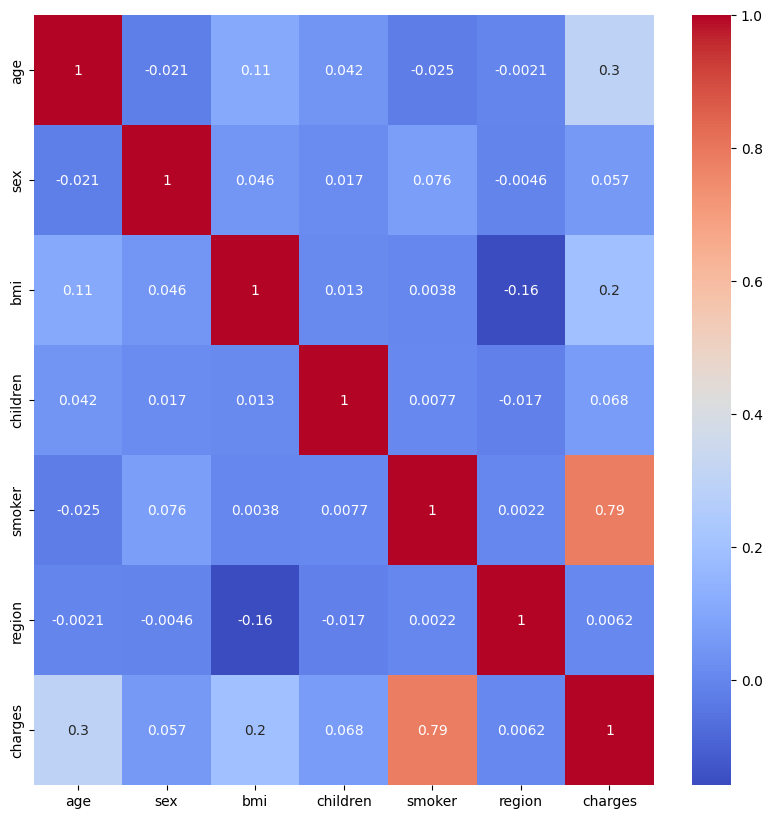

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

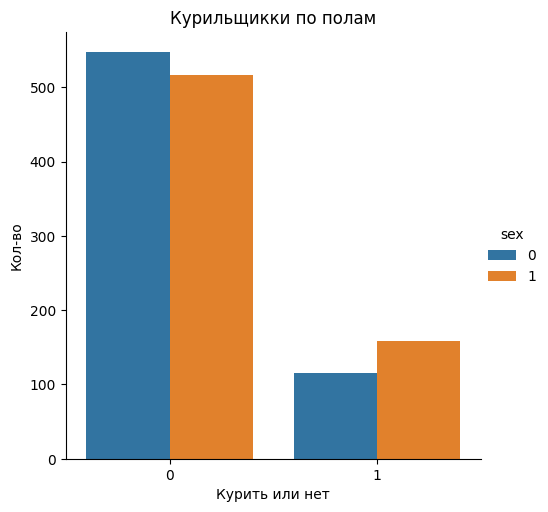

In [17]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Курильщикки по полам')
plt.xlabel('Курить или нет')
plt.ylabel('Кол-во')
plt.show()

Text(0, 0.5, 'Цена страховки')

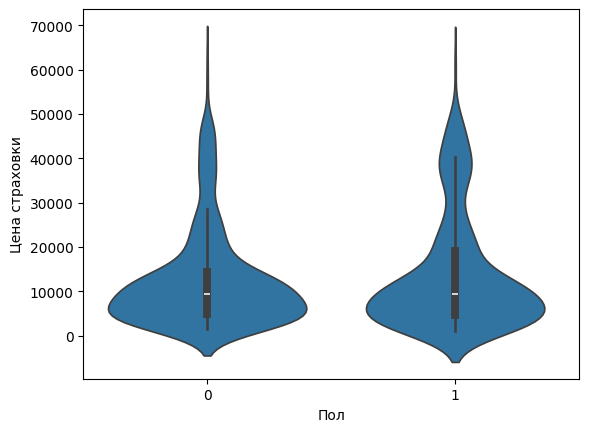

In [18]:
sns.violinplot(x = 'sex', y = 'charges', data = df)
plt.xlabel("Пол")
plt.ylabel("Цена страховки")


<Axes: title={'center': 'Box plot для женщин/цена'}, xlabel='charges', ylabel='smoker'>

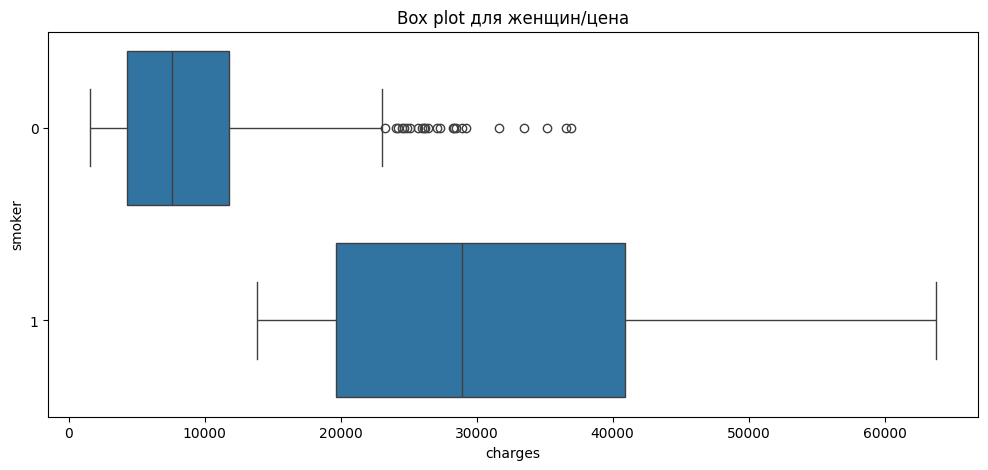

In [19]:
plt.figure(figsize=(12,5))
plt.title("Box plot для женщин/цена")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h")

<Axes: title={'center': 'Box plot для мужчин/цена'}, xlabel='charges', ylabel='smoker'>

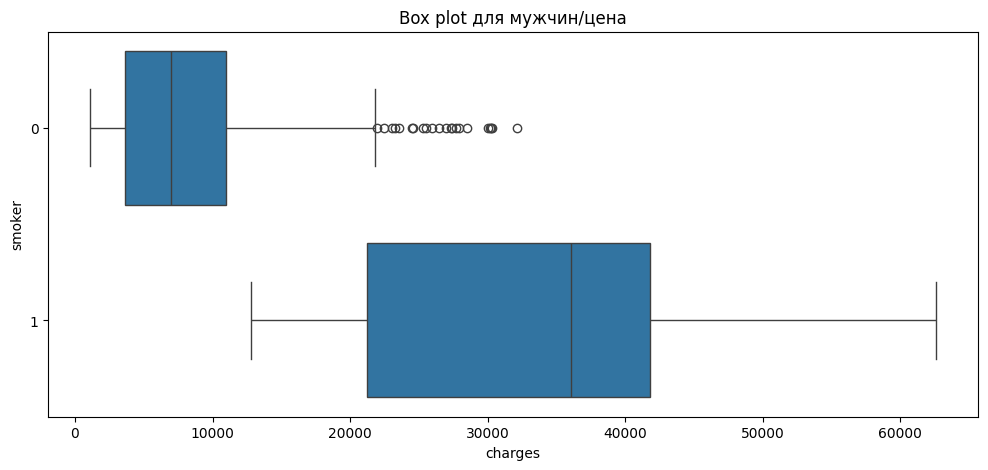

In [20]:
plt.figure(figsize=(12,5))
plt.title("Box plot для мужчин/цена")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h")

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3370: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


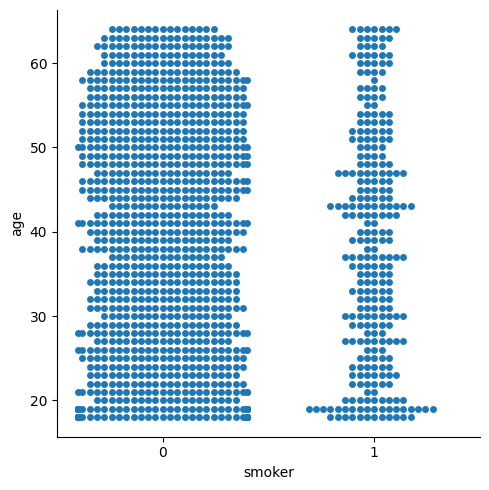

In [21]:
sns.catplot(x="smoker", y="age", kind="swarm", data=df)

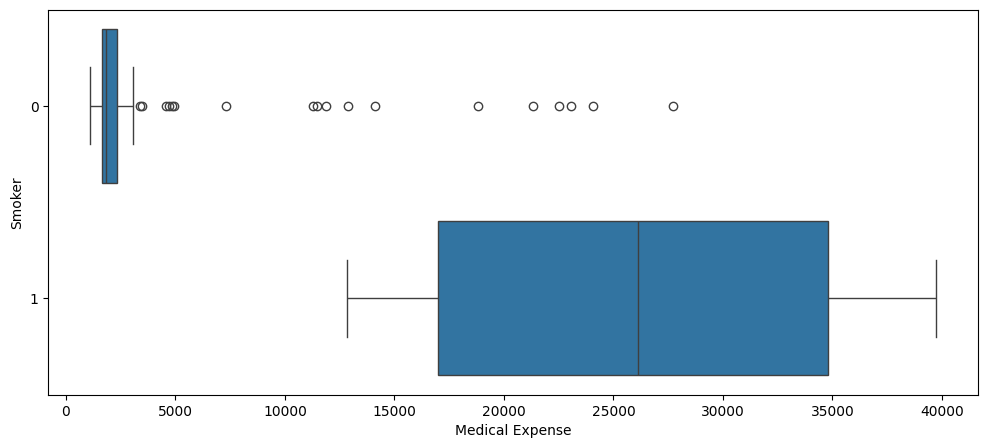

In [22]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("")
sns.boxplot(y="smoker", x="charges", data =  df[(df.age > 17) & (df.age < 21)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

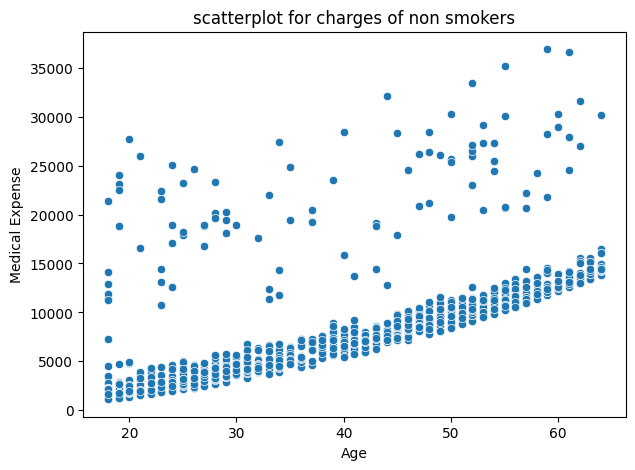

In [23]:
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data =  df[(df.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

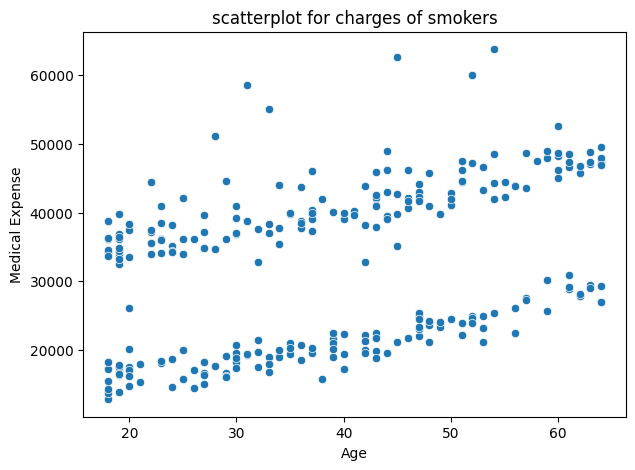

In [24]:

plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of smokers")
sns.scatterplot(x="age", y="charges", data =  df[(df.smoker == 1)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

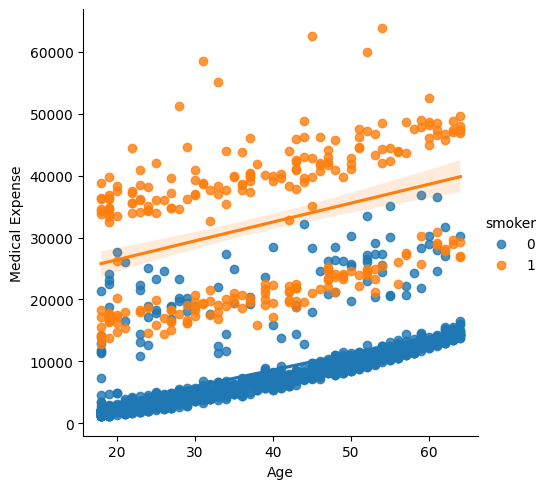

In [25]:
sns.lmplot(x="age", y="charges", data =  df, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

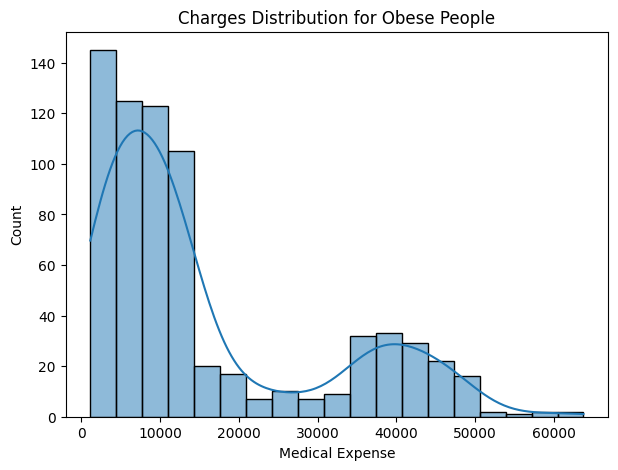

In [26]:
plt.figure(figsize=(7,5))
sns.histplot(df[(df.bmi >= 30)]['charges'], kde=True)
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

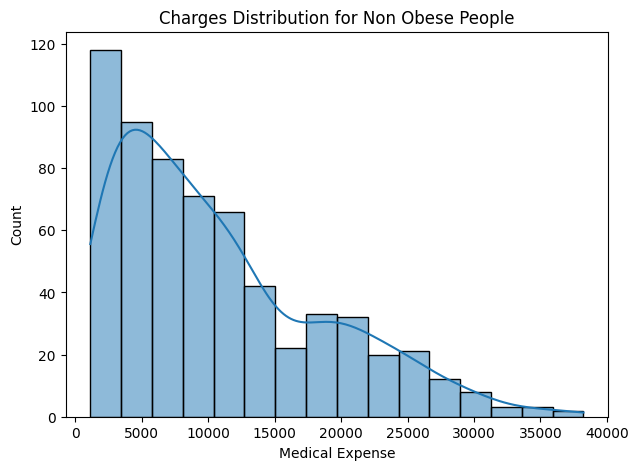

In [27]:
plt.figure(figsize=(7,5))
sns.histplot(df[(df.bmi < 30)]['charges'], kde=True)
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

Тренировка модели

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y = df['charges']  # Dependent variable
x = df.drop(['charges'], axis=1)  # Independent variables

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train

array([[ 1.25896807, -0.43992674, -0.90121235, ..., -0.5547002 ,
        -0.61307205,  1.74949385],
       [ 0.83577252, -0.12778028, -0.06734151, ..., -0.5547002 ,
         1.63112965, -0.57159389],
       [-1.49180297,  0.21024361,  0.76652932, ..., -0.5547002 ,
         1.63112965, -0.57159389],
       ...,
       [ 0.83577252, -0.81191475, -0.06734151, ..., -0.5547002 ,
        -0.61307205,  1.74949385],
       [ 0.20097921,  0.53047677, -0.90121235, ..., -0.5547002 ,
        -0.61307205,  1.74949385],
       [ 0.34204439,  0.56605823, -0.06734151, ..., -0.5547002 ,
         1.63112965, -0.57159389]])

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
#model training
model.fit(x_train, y_train)
#model accuracy
model.score(x_train,y_train)

0.7633895728397835

In [33]:
y_pred = model.predict(x_test)
y_pred

array([ 8039.0335671 ,  5851.81066599, 15121.87779259, 11469.47513591,
        3738.84186392,  9586.0428061 ,  9507.61458808, 26051.46631684,
        7763.05611133, 30735.58645808,  1701.73460515,  4163.1476031 ,
        7367.56347239, 11198.48718218, 12877.87722176, 11103.43087865,
        5733.97000282, 18180.06664578, 10647.5672011 , 30862.07022771,
       34086.19231559,  4284.98007352,  1233.74191862,  7300.46349407,
        4479.1354247 , 13365.14309839, 11769.87470428, 10293.5357675 ,
        6356.44385932, 30974.36801269, -1775.65554328, 33931.50289922,
        9626.39019922,  7373.2209696 ,  8217.52602351, 12098.64755342,
       13424.24817602, 12621.49432311,  9905.96182142,  8426.30849029,
       16046.06595926,  9791.18108222,  5491.6017285 , 11491.10140168,
        5574.35480774,  7457.63797955,  6593.08566755, 34198.96778869,
       11065.12121643, 10621.11604773, 32822.68537667,  5665.63513704,
       10313.40133263, 14611.5432172 , 11291.02780775, 13444.86400961,
      

In [31]:
from sklearn import metrics

print("MAE: ", (metrics.mean_absolute_error(y_pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(y_pred, y_test)))
print("R2 score: ", (metrics.r2_score(y_pred, y_test)))

MAE:  4541.669885342536
MSE:  42678138.3537655
R2 score:  0.6161107616072092


In [32]:
import pickle

filename = 'insurance_model.sav'
pickle.dump(model, open(filename, 'wb'))